# FOREST FIRES

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
#IMPORTING DATASET
forest_fires =pd.read_csv('C://Users/Hp/Desktop/Data Science Assignment/Support Vector Machines/forestfires.csv')

In [3]:
forest_fires

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


### EDA

In [4]:
forest_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
forest_fires.duplicated().sum()

8

In [6]:
forest_fires.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

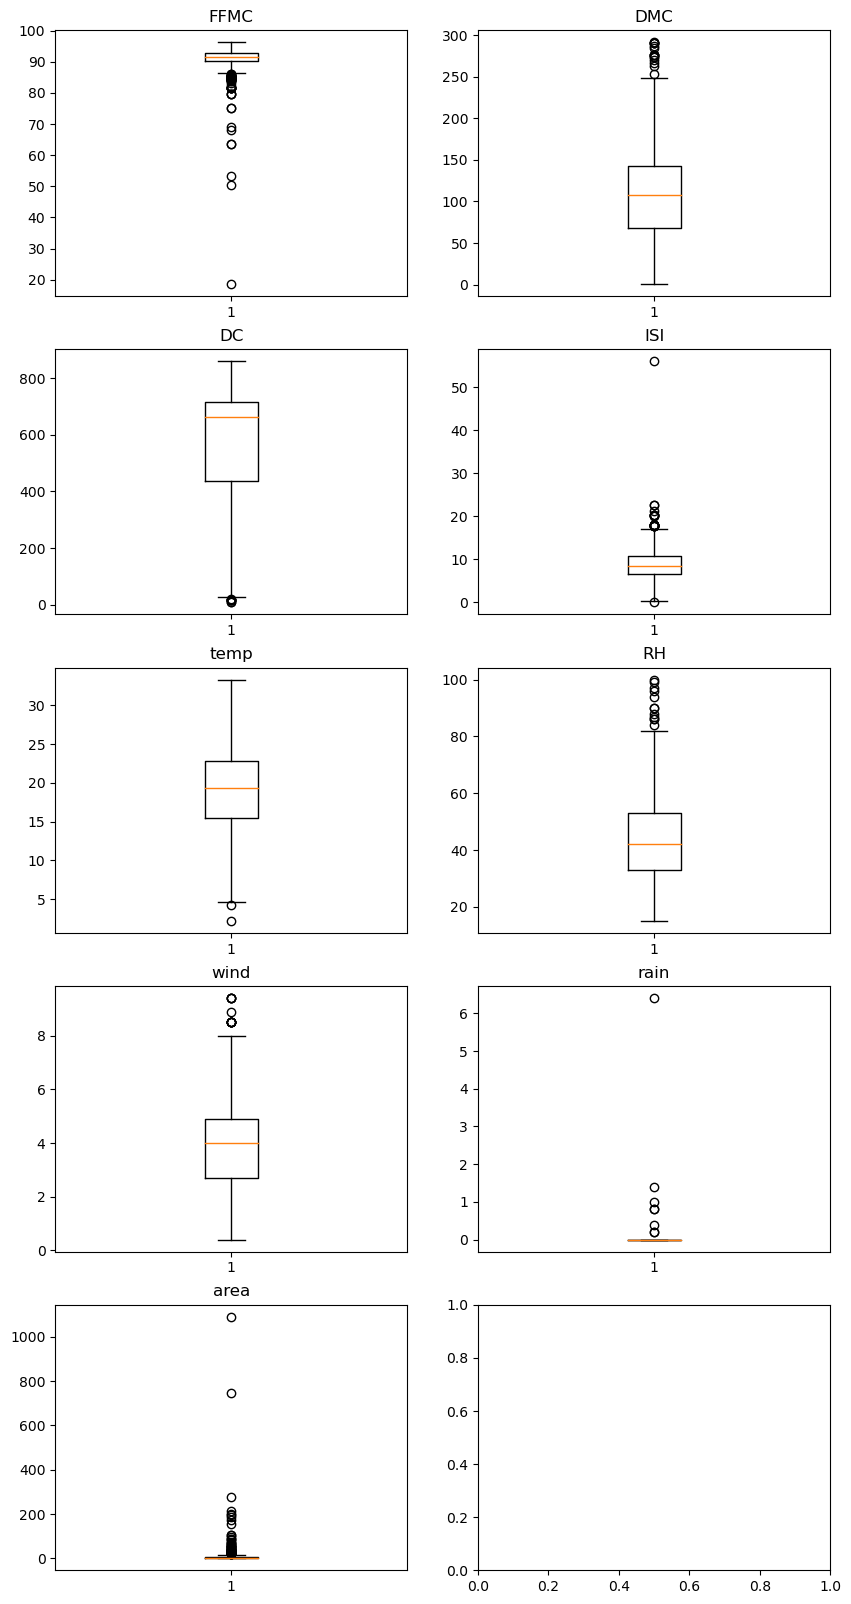

In [7]:
import matplotlib.pyplot as plt
fig,axs=plt.subplots(5,2,figsize=(10,20))
axs[0,0].boxplot(forest_fires.FFMC)
axs[0,1].boxplot(forest_fires.DMC)
axs[1,0].boxplot(forest_fires.DC)
axs[1,1].boxplot(forest_fires.ISI)
axs[2,0].boxplot(forest_fires.temp)
axs[2,1].boxplot(forest_fires.RH)
axs[3,0].boxplot(forest_fires.wind)
axs[3,1].boxplot(forest_fires.rain)
axs[4,0].boxplot(forest_fires.area)
axs[0,0].set_title("FFMC")
axs[0,1].set_title("DMC")
axs[1,0].set_title("DC")
axs[1,1].set_title("ISI")
axs[2,0].set_title("temp")
axs[2,1].set_title("RH")
axs[3,0].set_title("wind")
axs[3,1].set_title("rain")
axs[4,0].set_title("area")
plt.show()

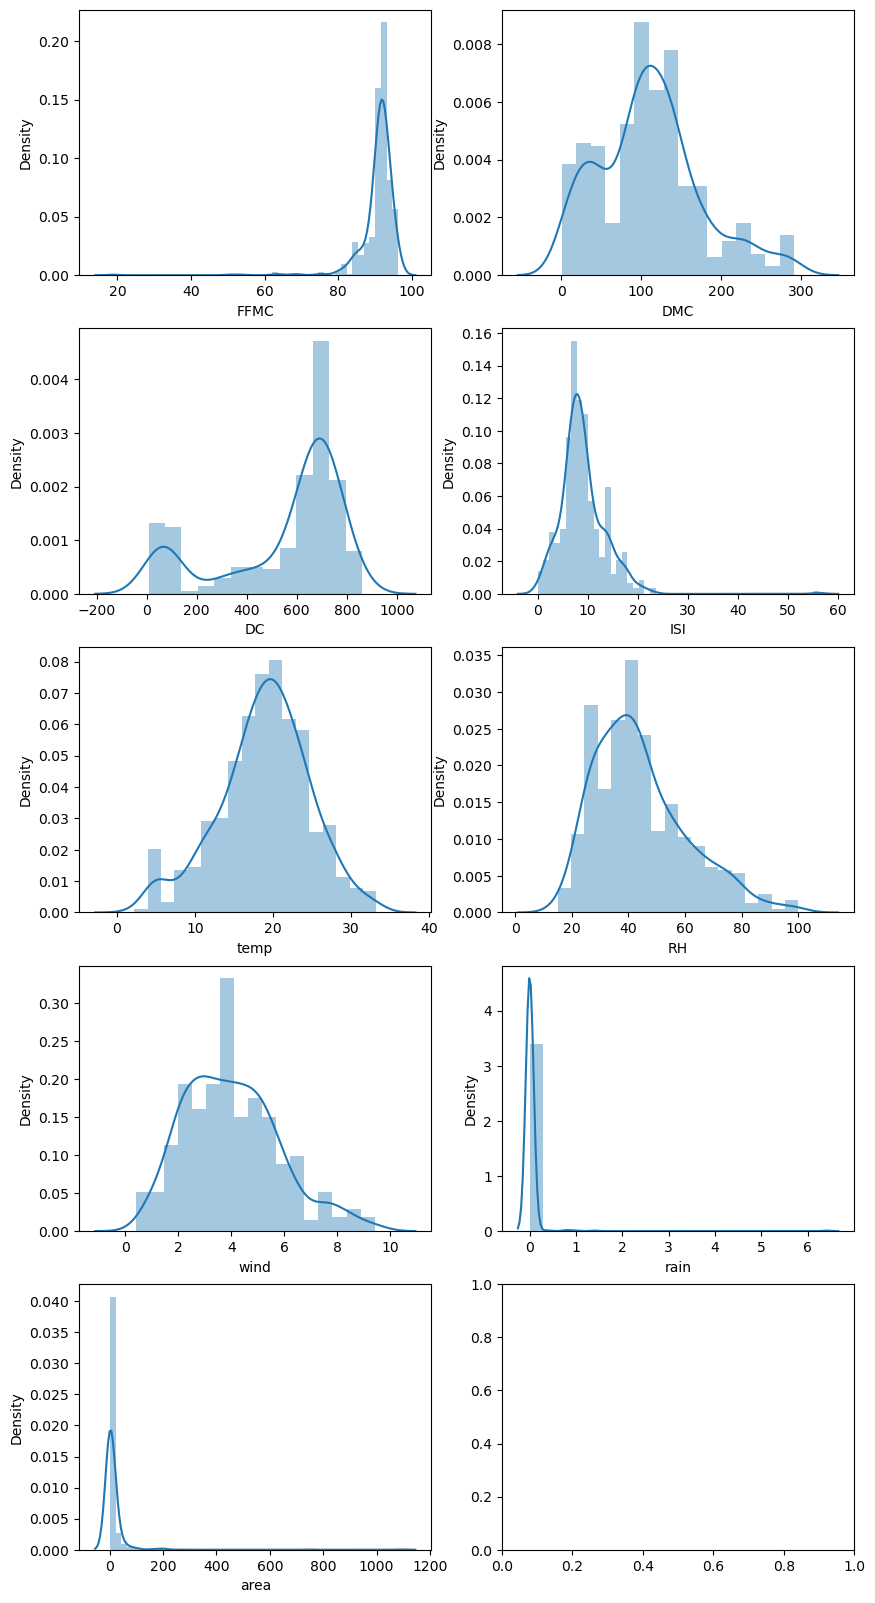

In [8]:
import seaborn as sns
fig,axs=plt.subplots(5,2,figsize=(10,20))
sns.distplot(forest_fires.FFMC,ax=axs[0,0])
sns.distplot(forest_fires.DMC,ax=axs[0,1])
sns.distplot(forest_fires.DC,ax=axs[1,0])
sns.distplot(forest_fires.ISI,ax=axs[1,1])
sns.distplot(forest_fires.temp,ax=axs[2,0])
sns.distplot(forest_fires.RH,ax=axs[2,1])
sns.distplot(forest_fires.wind,ax=axs[3,0])
sns.distplot(forest_fires.rain,ax=axs[3,1])
sns.distplot(forest_fires.area,ax=axs[4,0])
plt.show()

In [9]:
forest_fires.drop(['month','day'],axis=1,inplace=True)

In [10]:
forest_fires

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


### LABEL ENCODING SIZE_CATEGORY COLUMN

In [11]:
forest_fires.loc[forest_fires.size_category=='small','size_category']=0
forest_fires.loc[forest_fires.size_category=='large','size_category']=1

In [12]:
x=forest_fires.iloc[:,:-1]
y=forest_fires.iloc[:,-1]

In [13]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
y=y.astype('float')
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
512    1.0
513    1.0
514    1.0
515    0.0
516    0.0
Name: size_category, Length: 517, dtype: float64

### SPLITTING THE DATA INTO TRAIN AND TEST DATA

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [16]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((413, 28), (413,), (104, 28), (104,))

### GRIDSEARCH CV

In [17]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[100,50,0.5,0.1,0.01,0.001,0.0001],
               'C':[15,14,13,12,11,10,0.1,0.001,0.0001]}]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001, 0.0001],
                          'gamma': [100, 50, 0.5, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}])

In [18]:
gsv.best_params_,gsv.best_score_

({'C': 15, 'gamma': 0.0001, 'kernel': 'rbf'}, 0.917828106852497)

### BUILDING THE FINAL MODEL

In [19]:
clf=SVC(C=15,gamma=0.0001)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [20]:
accuracy=accuracy_score(y_test,y_pred)*100
print("ACCURACY =",accuracy)

ACCURACY = 86.53846153846155


In [21]:
y_pred

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.])

In [22]:
#CONFUSION MATRIX
confusion_matrix(y_test,y_pred)

array([[74,  1],
       [13, 16]], dtype=int64)

In [23]:
#CLASSIFICATION REPORT 
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91        75
         1.0       0.94      0.55      0.70        29

    accuracy                           0.87       104
   macro avg       0.90      0.77      0.80       104
weighted avg       0.88      0.87      0.85       104



# 2) SALARY TRAIN AND SALARY TEST

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
Train_Data=pd.read_csv('C://Users/Hp/Desktop/Data Science Assignment/Support Vector Machines/SalaryData_Train(1).csv')
Test_Data=pd.read_csv('C://Users/Hp/Desktop/Data Science Assignment/Support Vector Machines/SalaryData_Test(1).csv')

In [26]:
Train_Data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [27]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [28]:
Train_Data.shape

(30161, 14)

In [29]:
Train_Data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [30]:
Train_Data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [31]:
Test_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [32]:
Test_Data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [33]:
Test_Data.shape

(15060, 14)

In [34]:
Test_Data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

<AxesSubplot:xlabel='Salary', ylabel='count'>

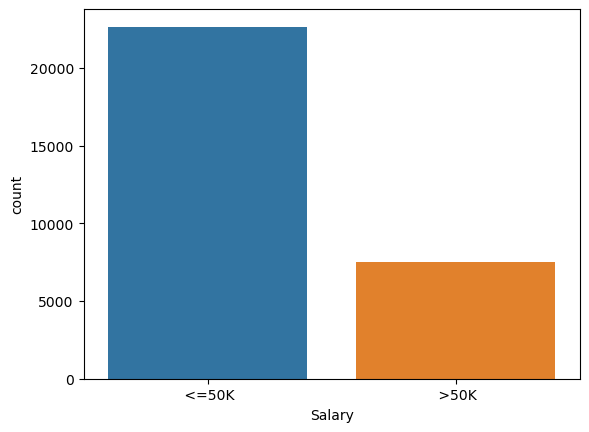

In [35]:
import seaborn as sns
sns.countplot(Train_Data.Salary)

In [36]:
# frequency for categorical fields 
category_col =['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary'] 
for c in category_col:
    print (c)
    print (Train_Data[c].value_counts())
    print('\n')

workclass
 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64


education
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64


maritalstatus
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64


occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-cler

In [37]:
# frequency for categorical fields 
category_col =['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary'] 
for c in category_col:
    print (c)
    print (Test_Data[c].value_counts())
    print('\n')

workclass
 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64


education
 HS-grad         4943
 Some-college    3221
 Bachelors       2526
 Masters          887
 Assoc-voc        652
 11th             571
 Assoc-acdm       499
 10th             403
 7th-8th          266
 Prof-school      243
 9th              221
 12th             200
 Doctorate        169
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64


maritalstatus
 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64


occupation
 Exec-managerial      1992
 Craft-repair         1990
 Prof-specialty       1970
 Sales          

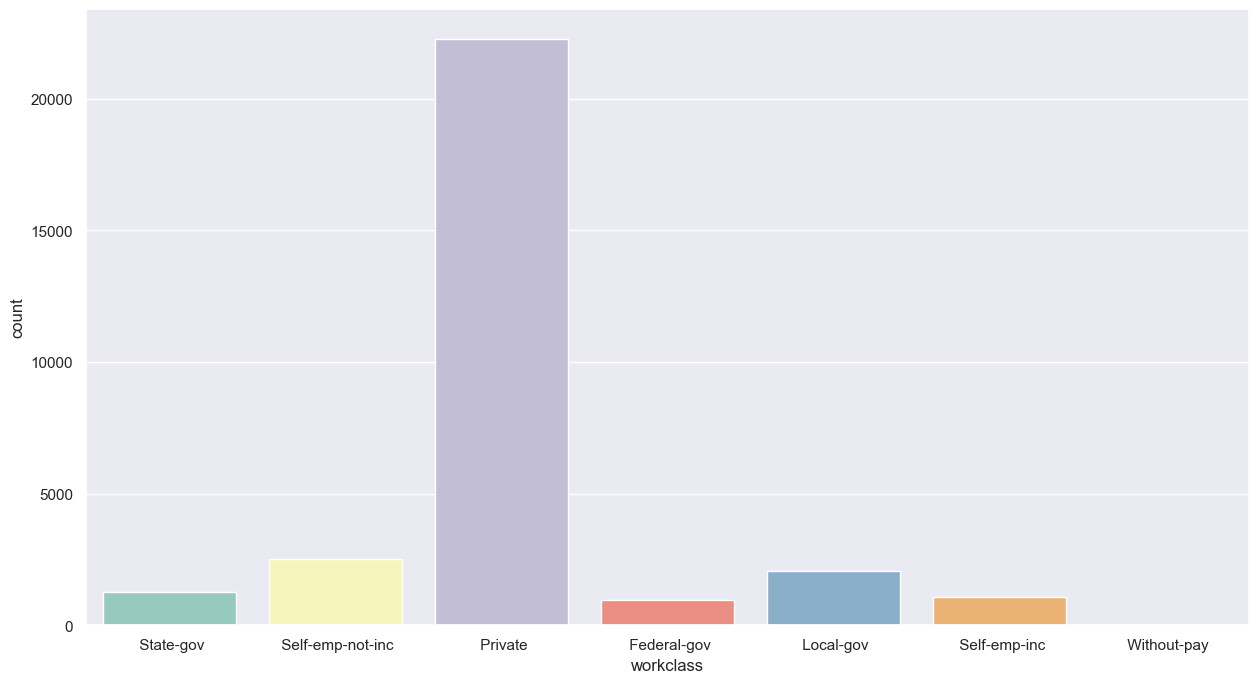

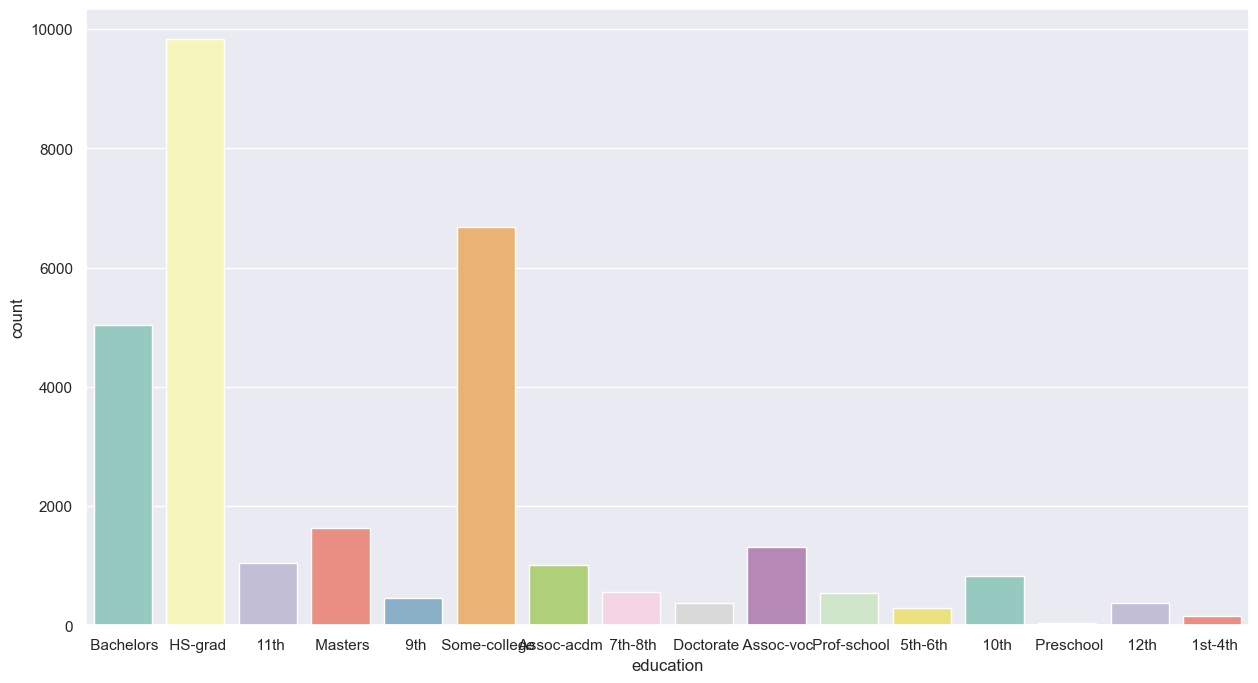

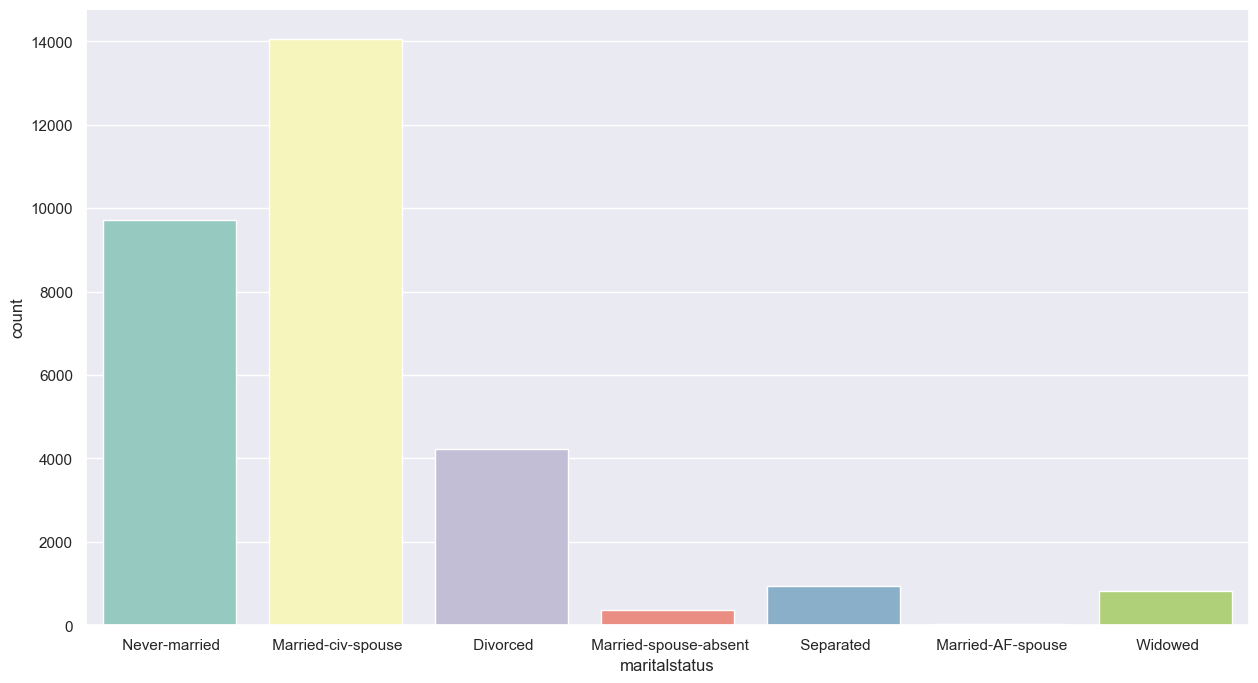

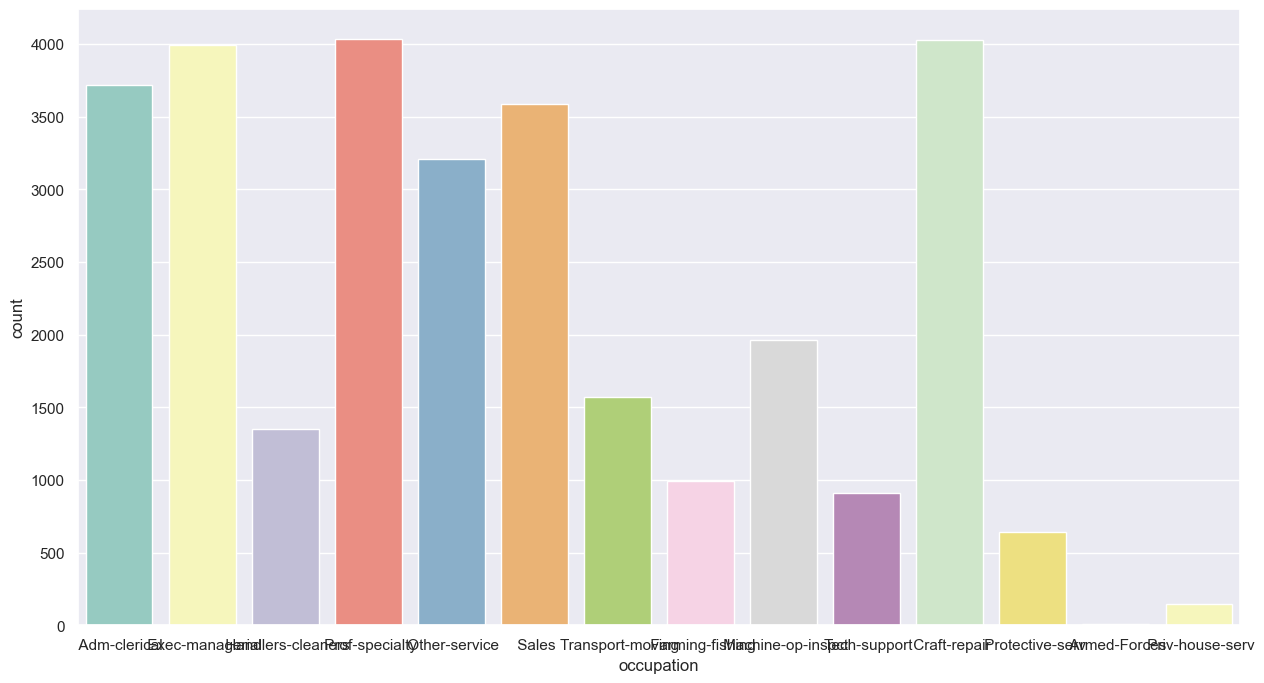

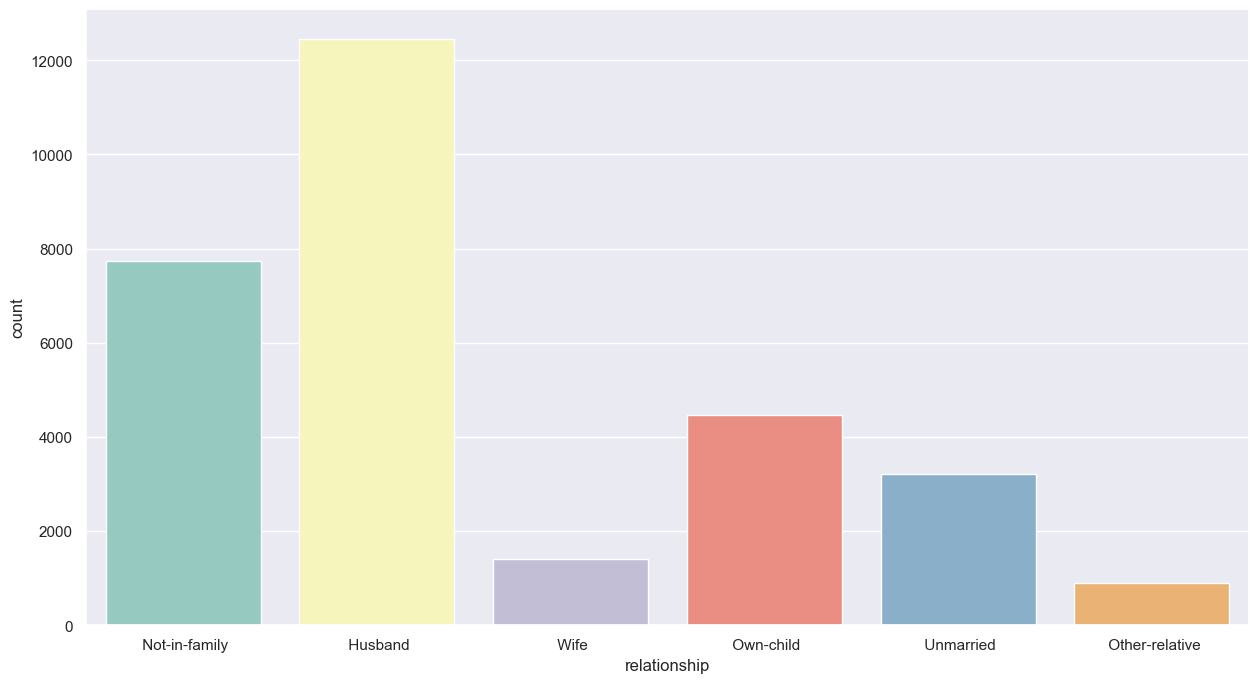

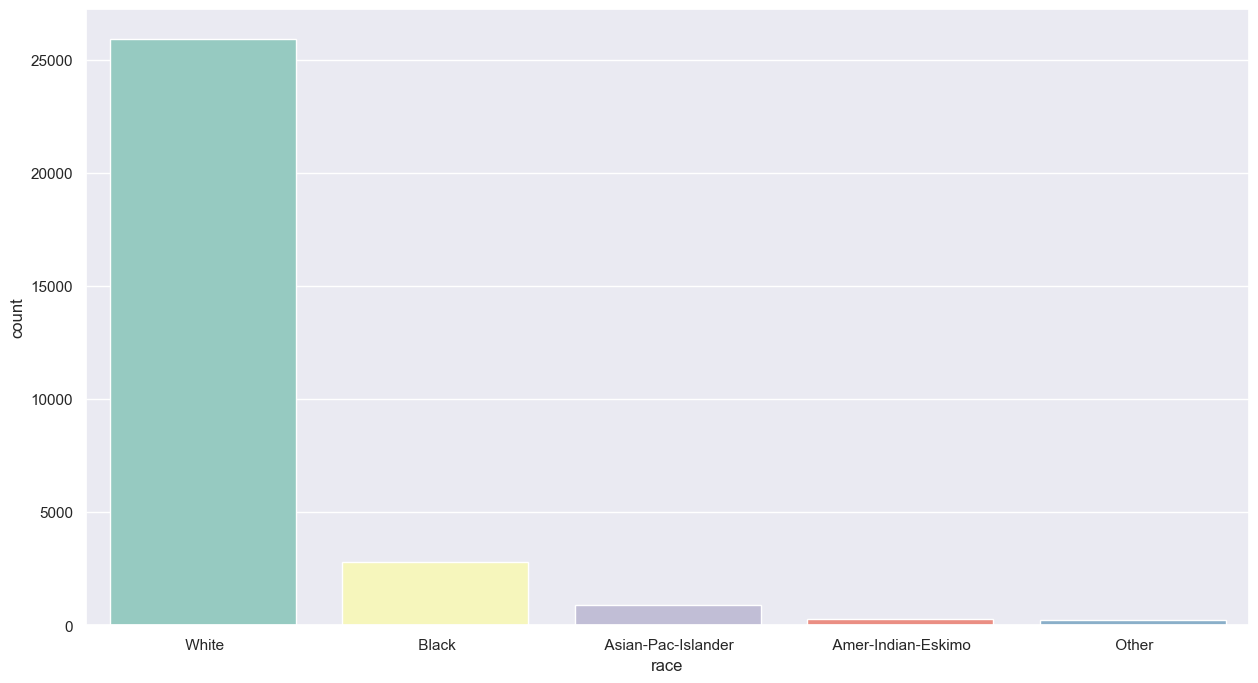

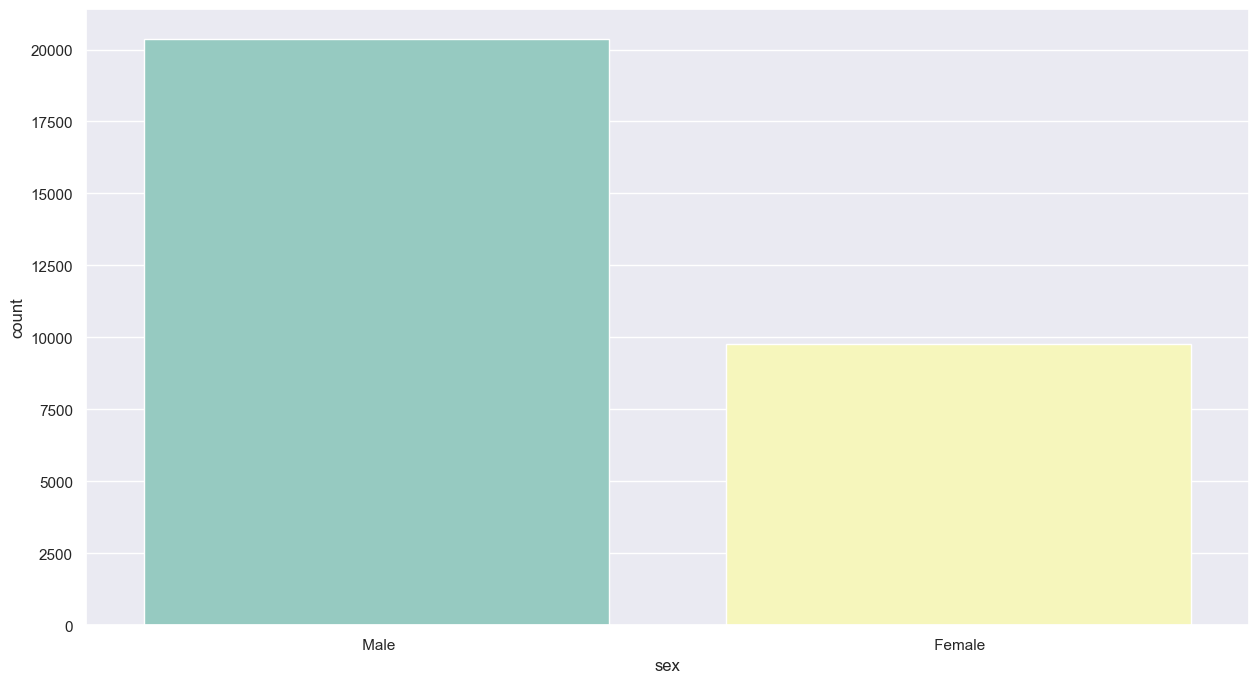

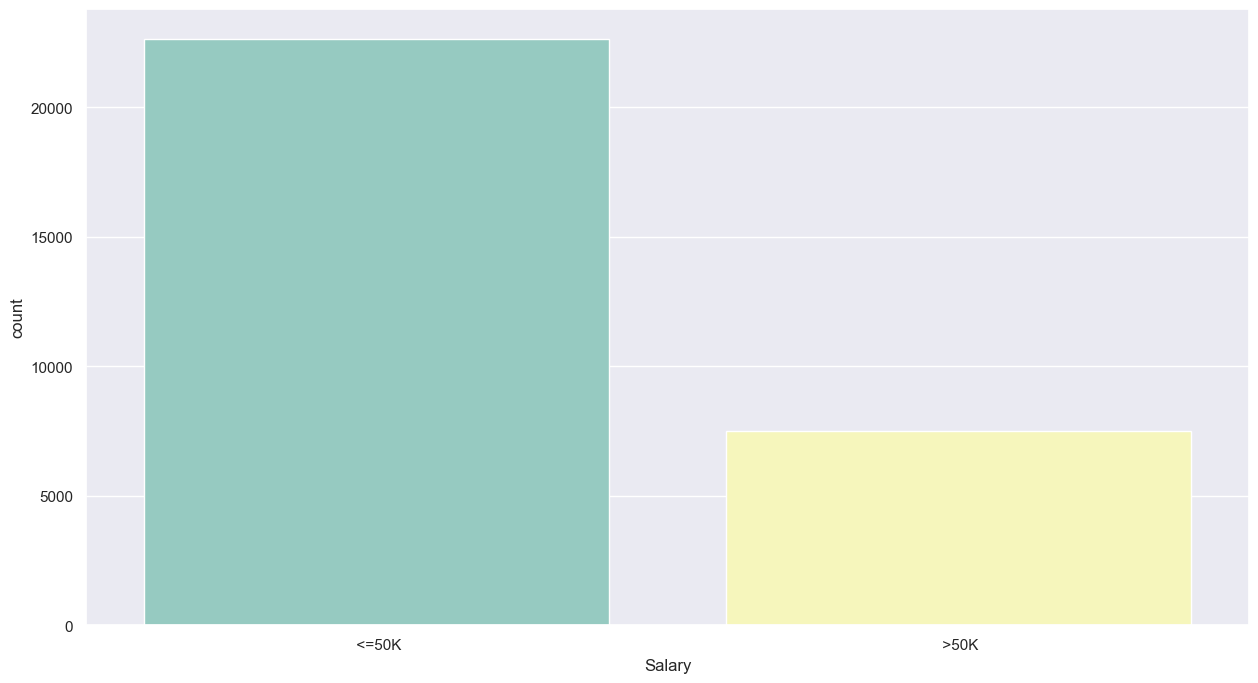

In [38]:
# countplot for all categorical columns
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
cat_col = ['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex','Salary']
for col in cat_col:
    plt.figure() #this creates a new figure on which your plot will appear
    sns.countplot(x = col, data = Train_Data, palette = 'Set3');

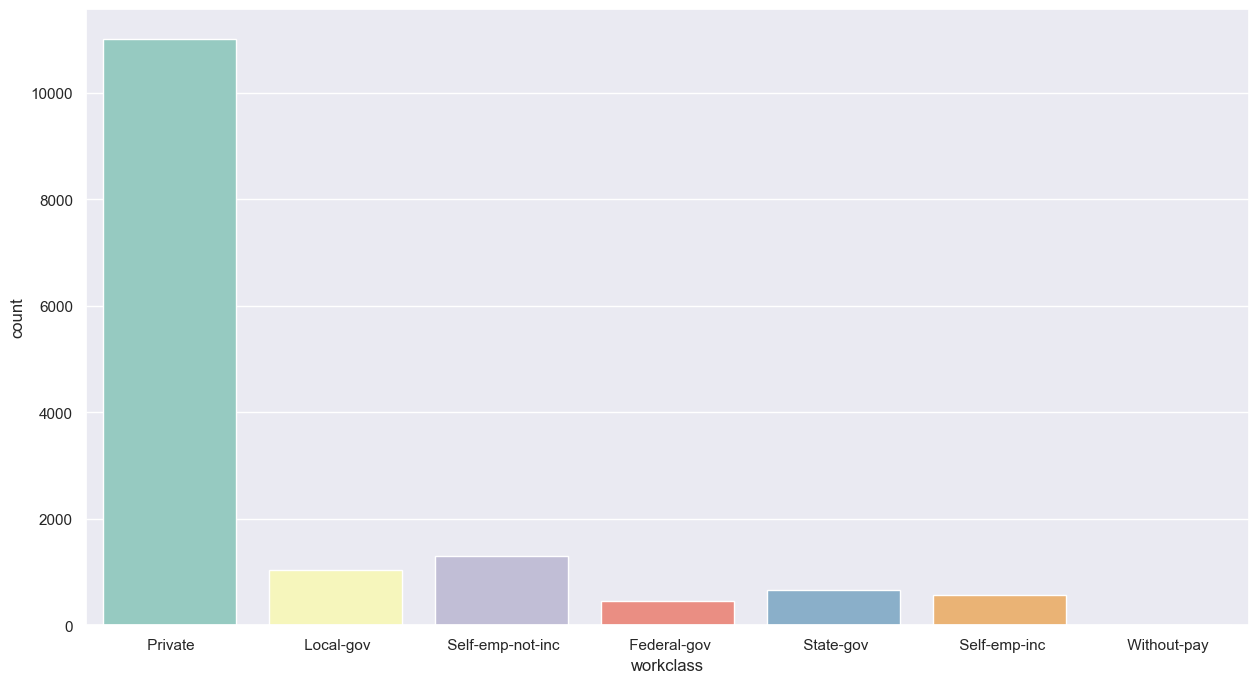

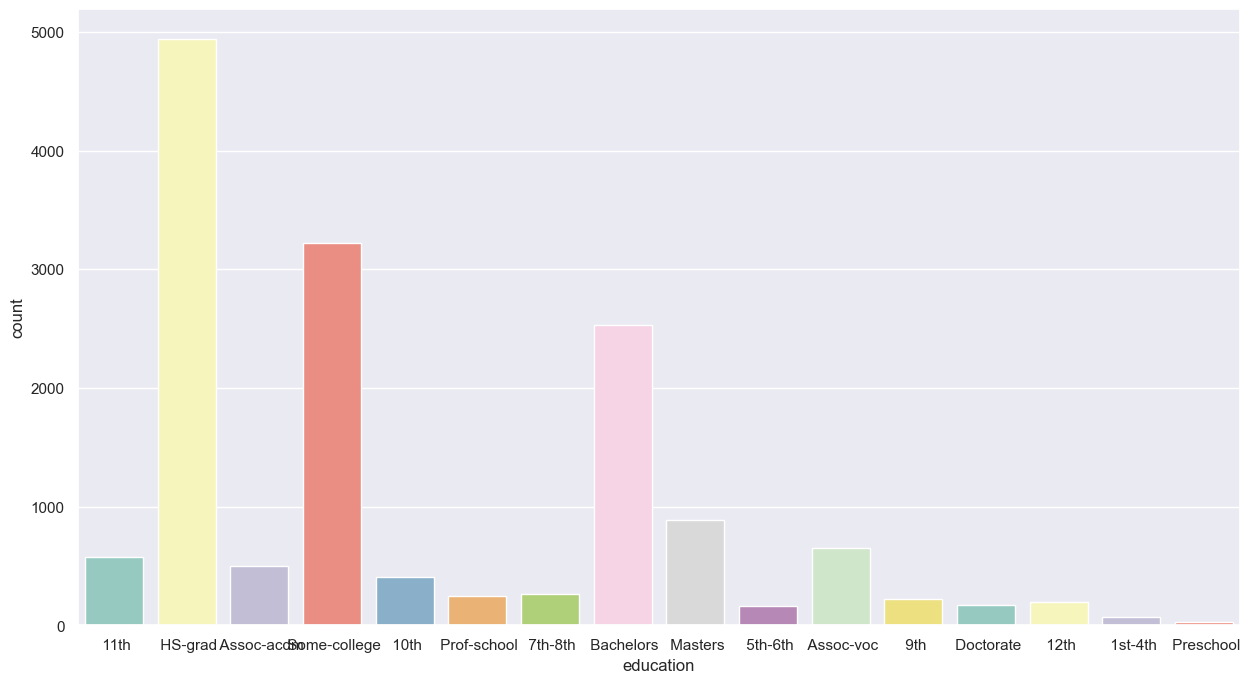

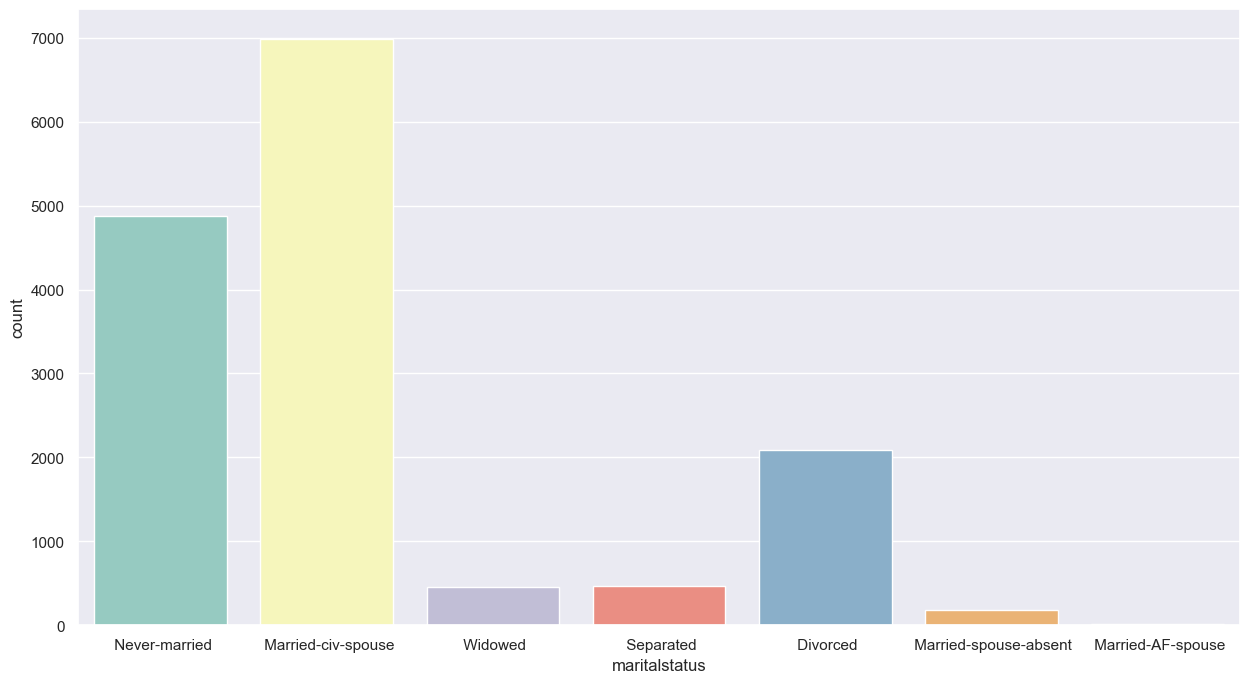

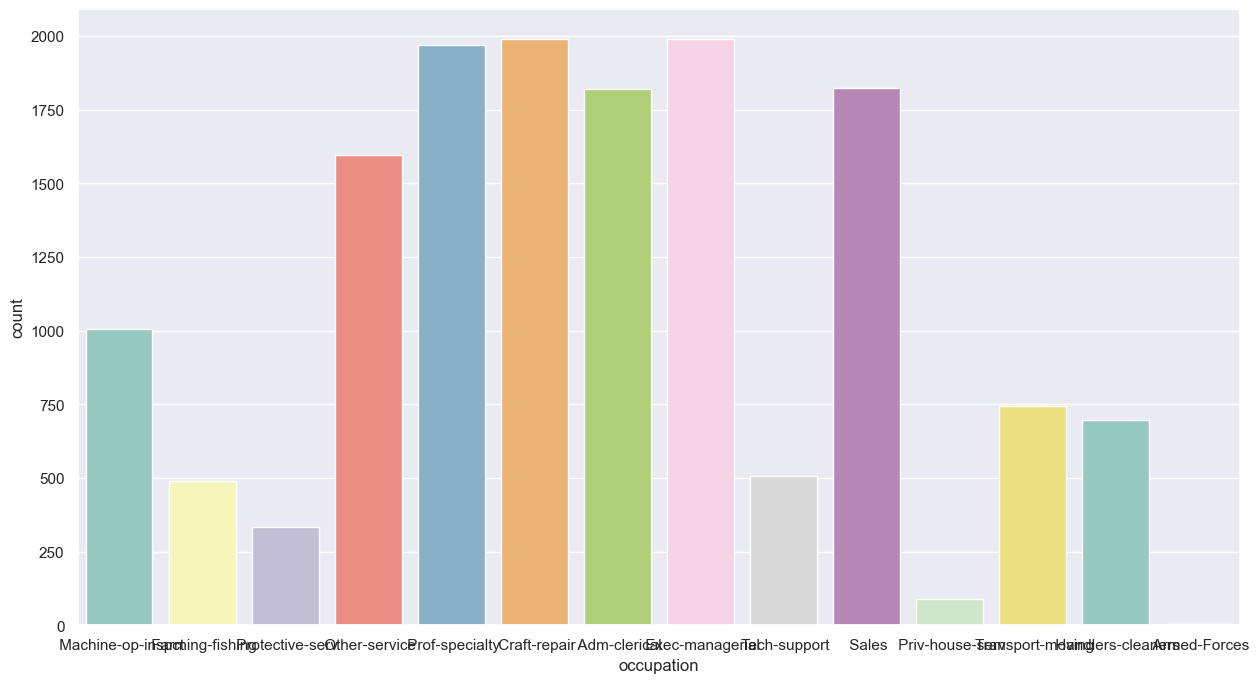

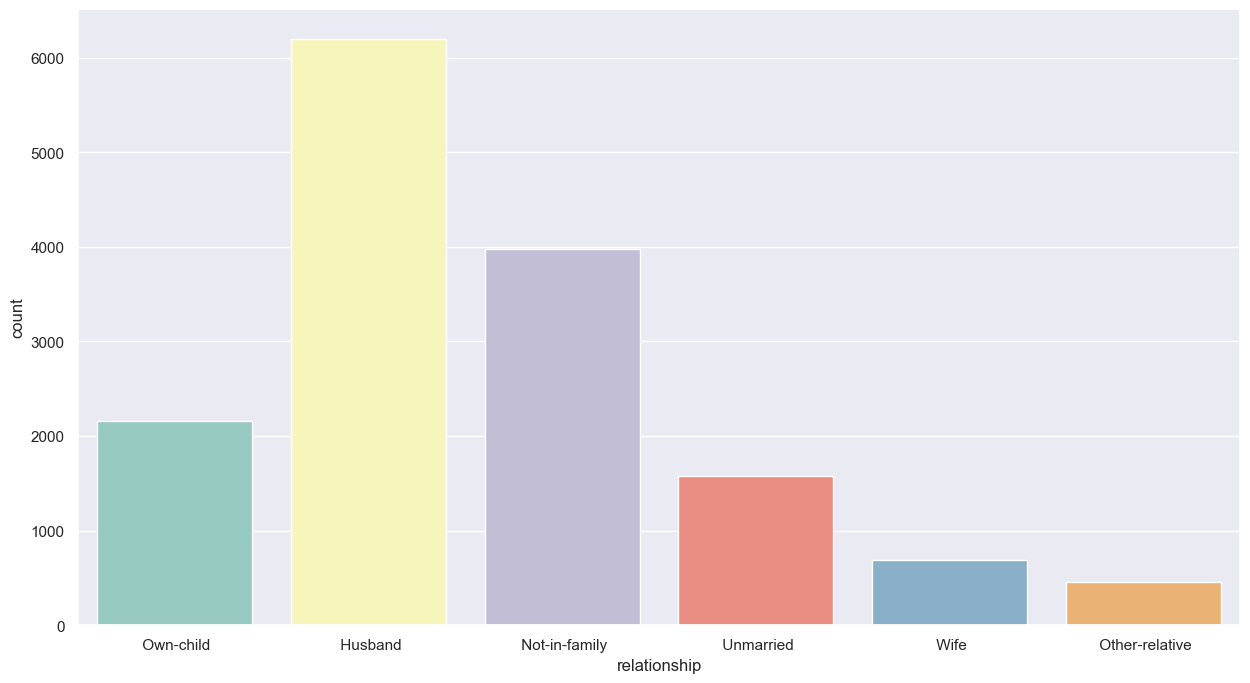

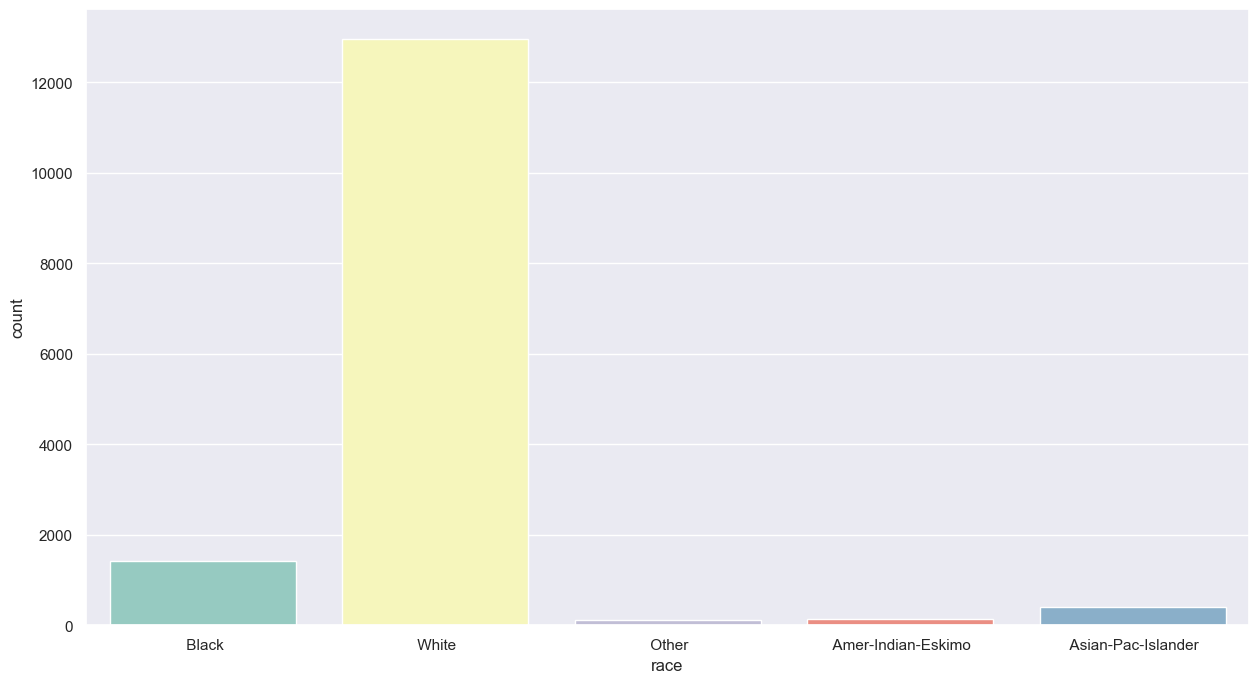

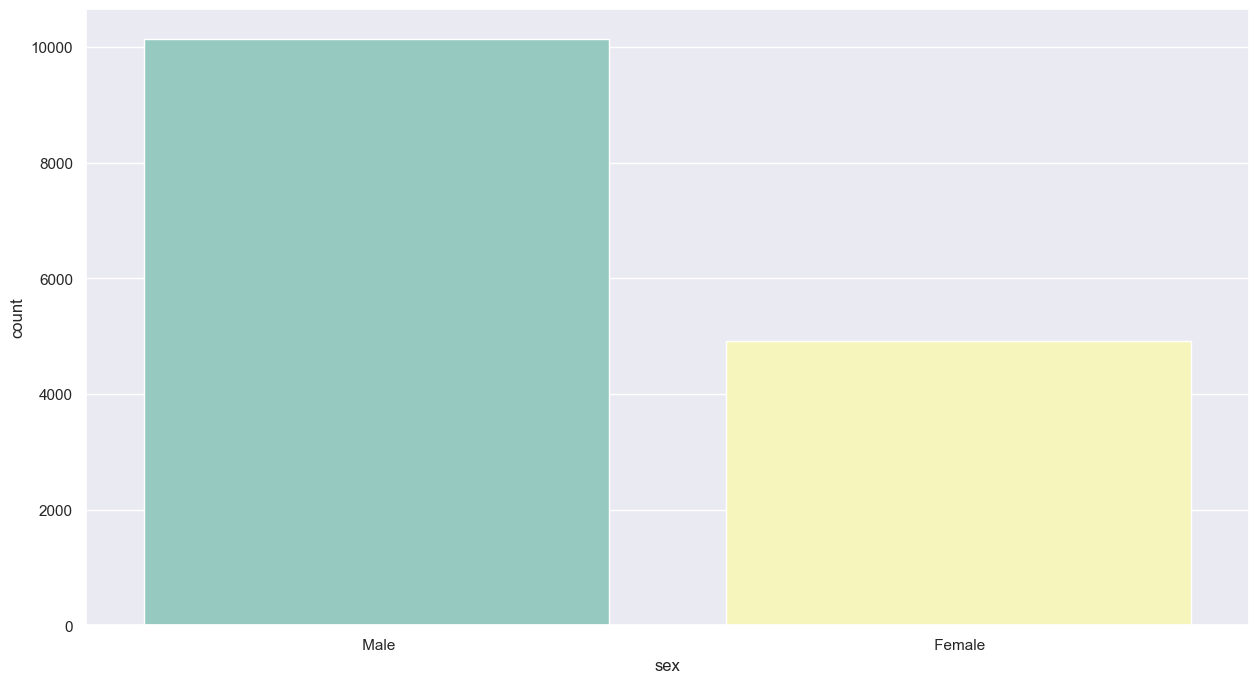

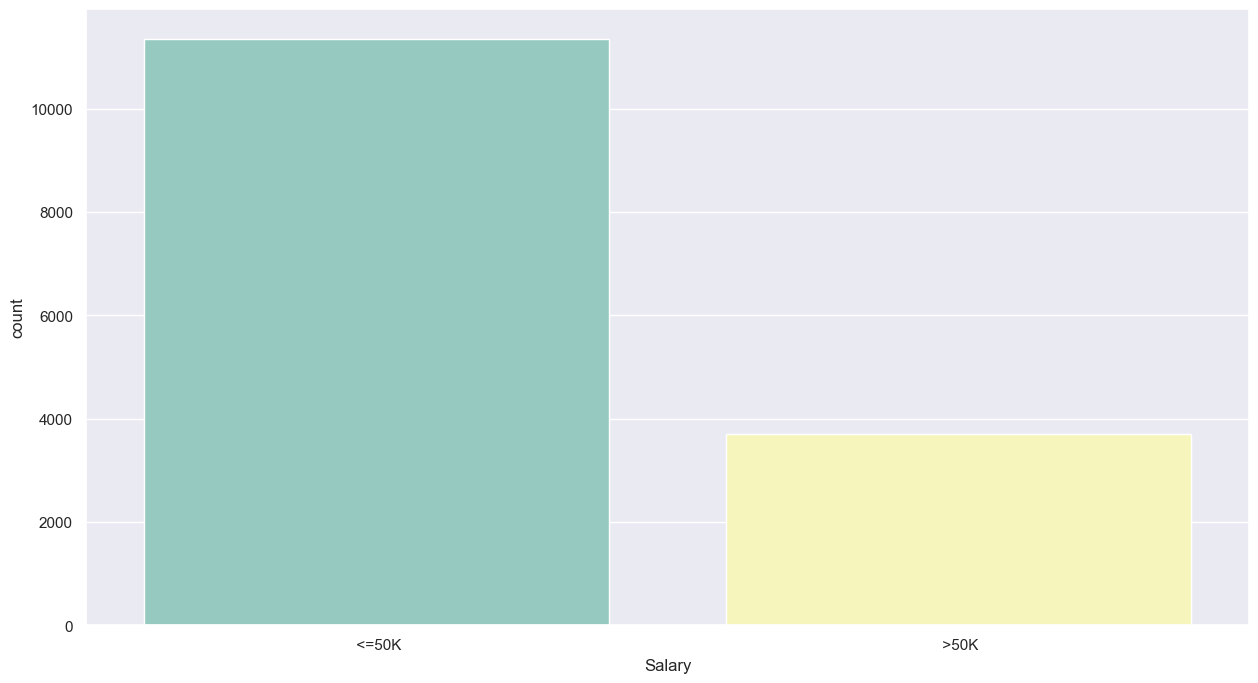

In [39]:
# countplot for all categorical columns
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
cat_col = ['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex','Salary']
for col in cat_col:
    plt.figure() #this creates a new figure on which your plot will appear
    sns.countplot(x = col, data = Test_Data, palette = 'Set3');

In [40]:
# printing unique values from each categoricla columns

print('workclass',Train_Data.workclass.unique())
print('education',Train_Data.education.unique())
print('maritalstatus',Train_Data['maritalstatus'].unique())
print('occupation',Train_Data.occupation.unique())
print('relationship',Train_Data.relationship.unique())
print('race',Train_Data.race.unique())
print('sex',Train_Data.sex.unique())
print('native',Train_Data['native'].unique())
print('Salary',Train_Data.Salary.unique())

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
maritalstatus [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex [' Male' ' Female']
native [' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras

In [41]:
# printing unique values from each categoricla columns

print('workclass',Test_Data.workclass.unique())
print('education',Test_Data.education.unique())
print('maritalstatus',Test_Data['maritalstatus'].unique())
print('occupation',Test_Data.occupation.unique())
print('relationship',Test_Data.relationship.unique())
print('race',Test_Data.race.unique())
print('sex',Test_Data.sex.unique())
print('native',Test_Data['native'].unique())
print('Salary',Test_Data.Salary.unique())

workclass [' Private' ' Local-gov' ' Self-emp-not-inc' ' Federal-gov' ' State-gov'
 ' Self-emp-inc' ' Without-pay']
education [' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' 5th-6th' ' Assoc-voc' ' 9th'
 ' Doctorate' ' 12th' ' 1st-4th' ' Preschool']
maritalstatus [' Never-married' ' Married-civ-spouse' ' Widowed' ' Separated'
 ' Divorced' ' Married-spouse-absent' ' Married-AF-spouse']
occupation [' Machine-op-inspct' ' Farming-fishing' ' Protective-serv'
 ' Other-service' ' Prof-specialty' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Tech-support' ' Sales' ' Priv-house-serv'
 ' Transport-moving' ' Handlers-cleaners' ' Armed-Forces']
relationship [' Own-child' ' Husband' ' Not-in-family' ' Unmarried' ' Wife'
 ' Other-relative']
race [' Black' ' White' ' Other' ' Amer-Indian-Eskimo' ' Asian-Pac-Islander']
sex [' Male' ' Female']
native [' United-States' ' Peru' ' Guatemala' ' Mexico' ' Dominican-Republic'
 ' Ireland'

In [42]:
Train_Data[['Salary','age']].groupby(['Salary'],as_index=False).mean().sort_values(by='age',ascending=False)

,Salary,age
1,>50K,43.959110
0,<=50K,36.608264


In [43]:
Test_Data[['Salary','age']].groupby(['Salary'],as_index=False).mean().sort_values(by='age',ascending=False)

,Salary,age
1,>50K,44.101351
0,<=50K,37.031338


<AxesSubplot:xlabel='race', ylabel='prop'>

<Figure size 2000x500 with 0 Axes>

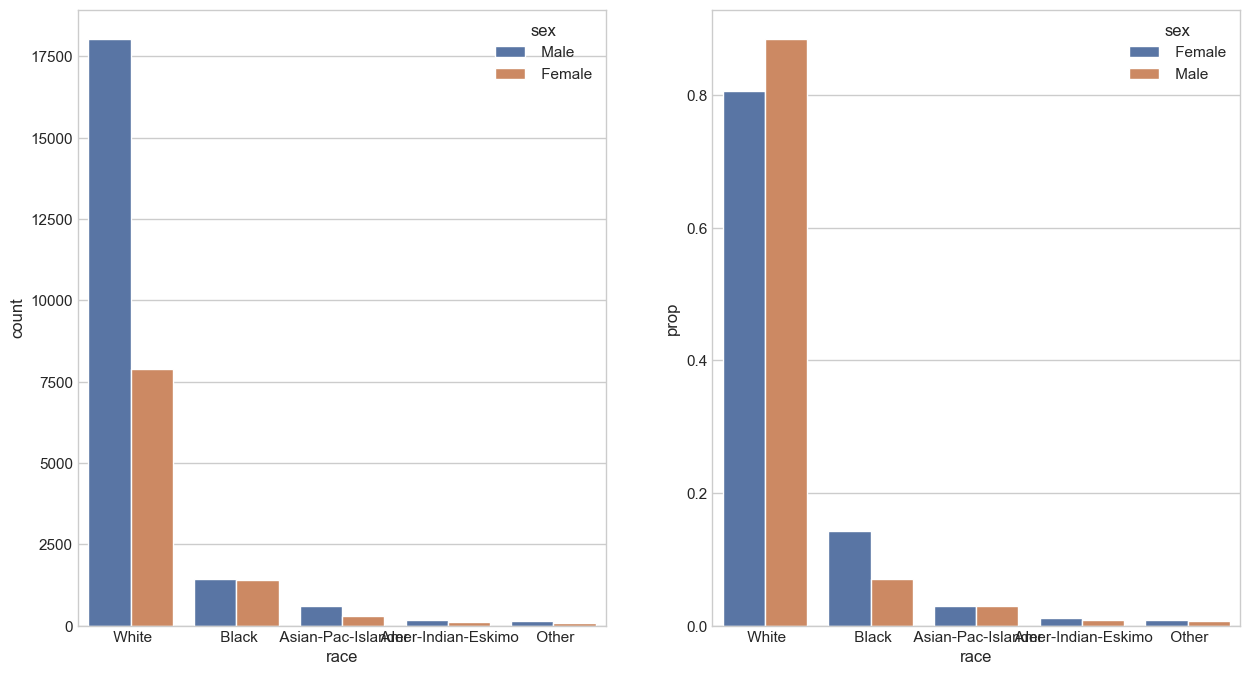

In [44]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "sex"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(20,5)) 
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=Train_Data, ax=axes[0])

prop_df = (Train_Data[x]
           .groupby(Train_Data[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

<AxesSubplot:xlabel='race', ylabel='prop'>

<Figure size 2000x500 with 0 Axes>

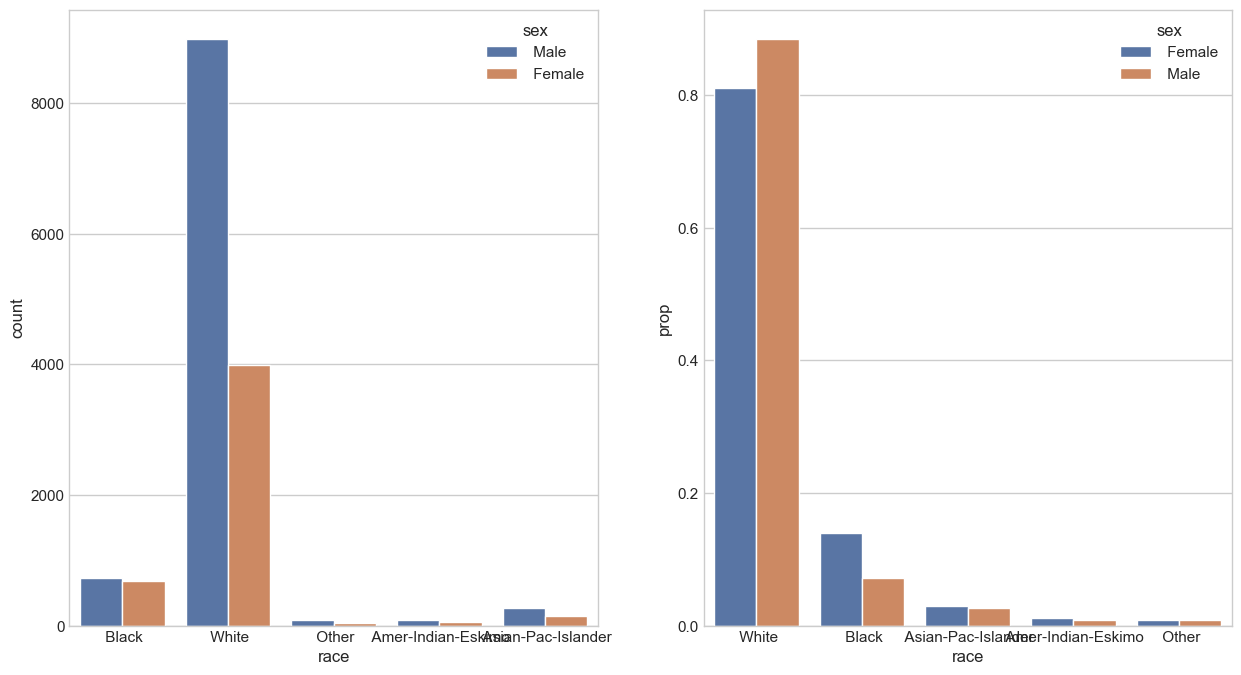

In [45]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "sex"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(20,5)) 
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=Test_Data, ax=axes[0])

prop_df = (Test_Data[x]
           .groupby(Test_Data[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

Text(0.5, 1.0, 'pair plots to understand the correlation')

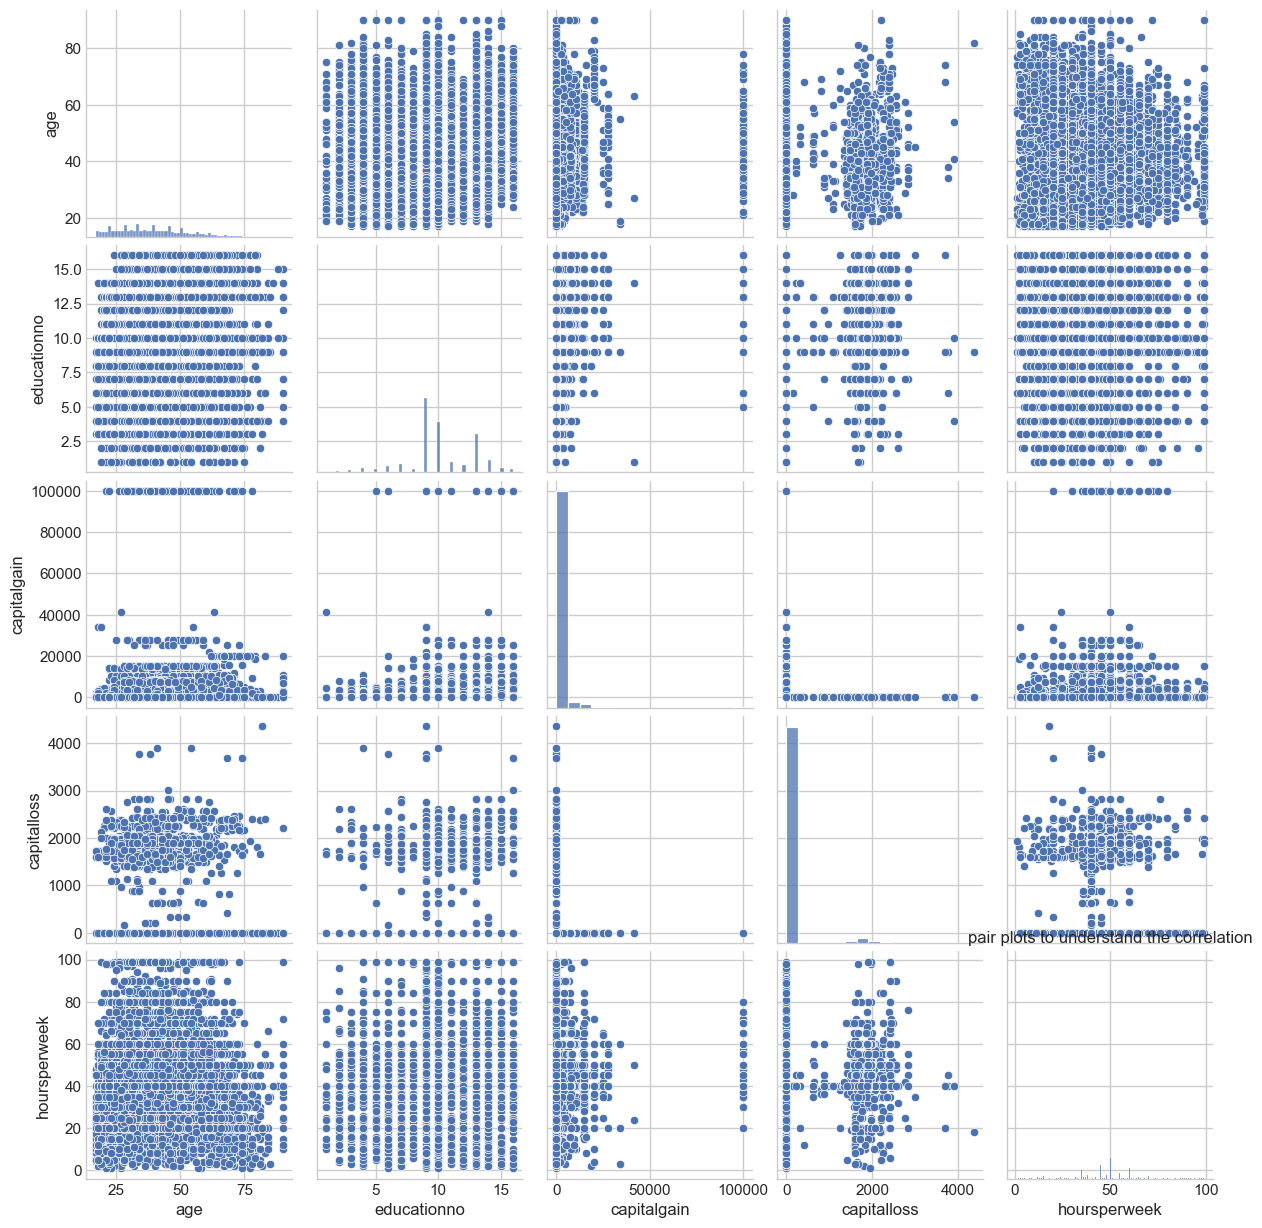

In [46]:
sns.pairplot(Train_Data)
plt.title('pair plots to understand the correlation')

Text(0.5, 1.0, 'Pair plots to understand the correlation')

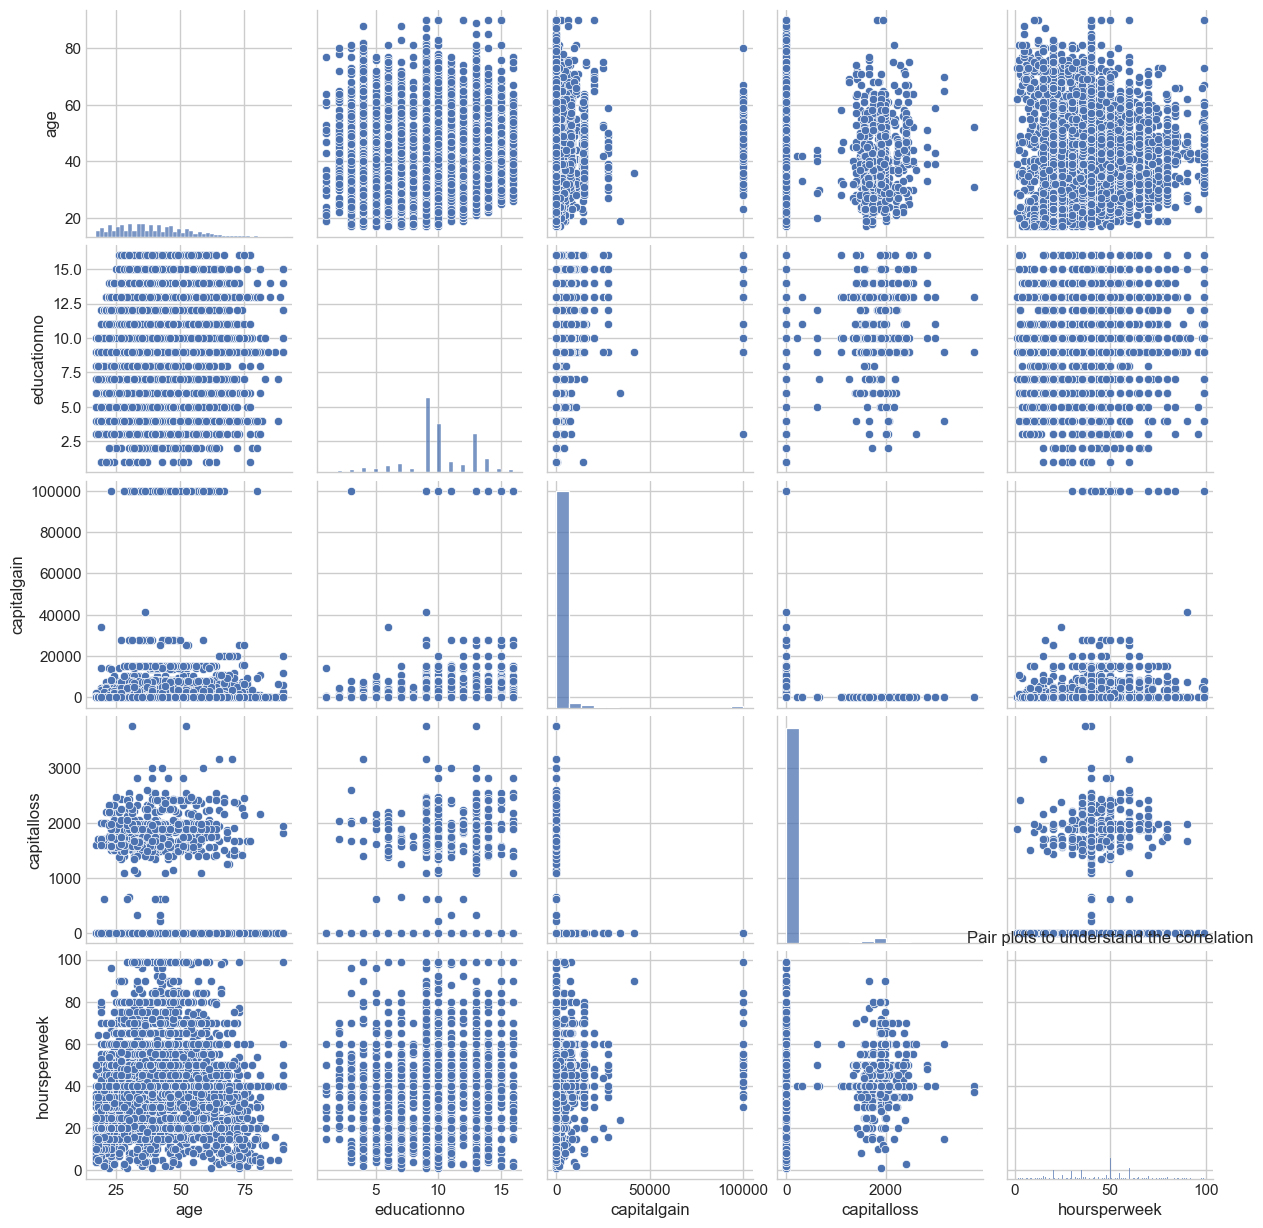

In [47]:
sns.pairplot(Test_Data)
plt.title('Pair plots to understand the correlation')

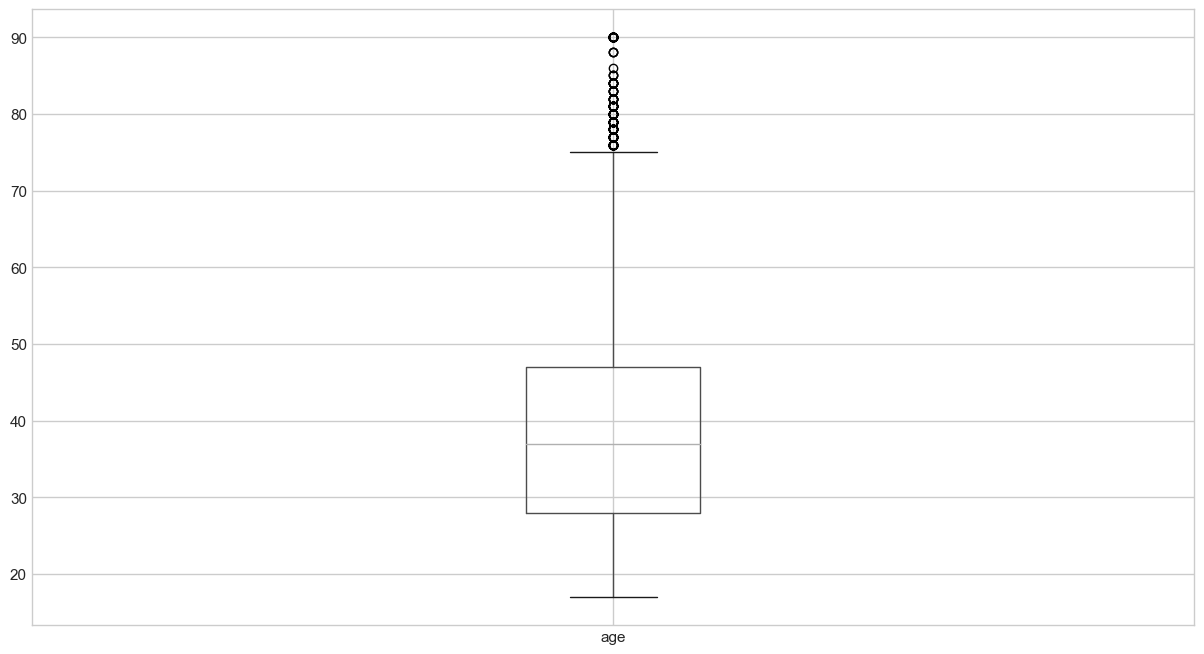

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

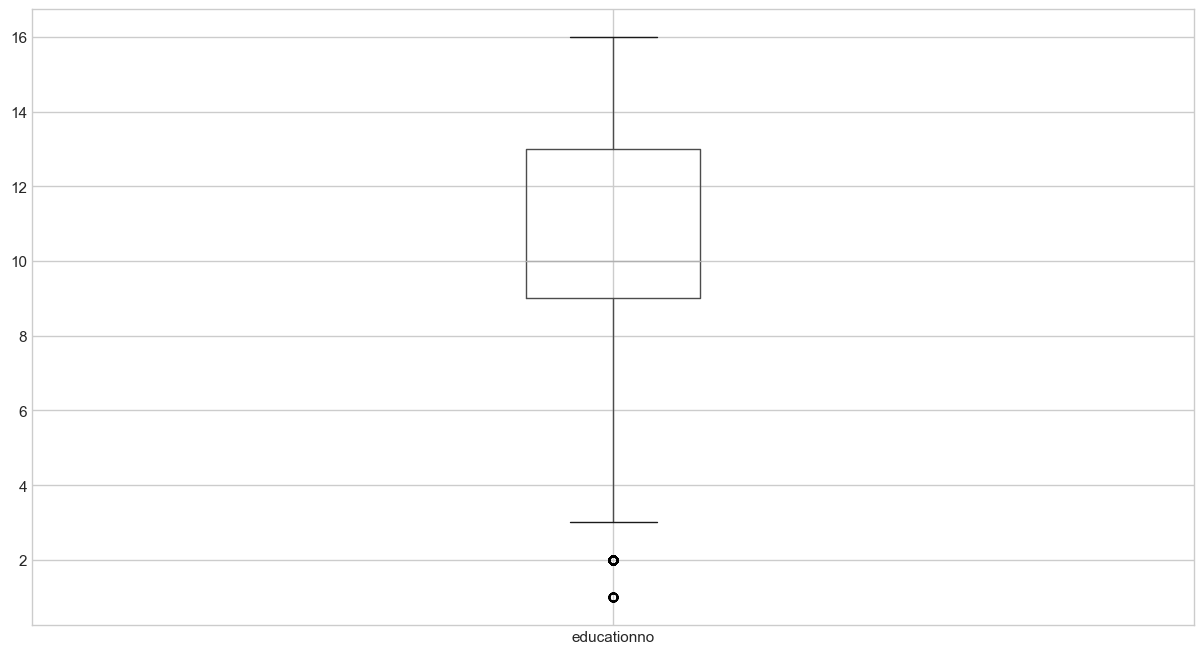

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

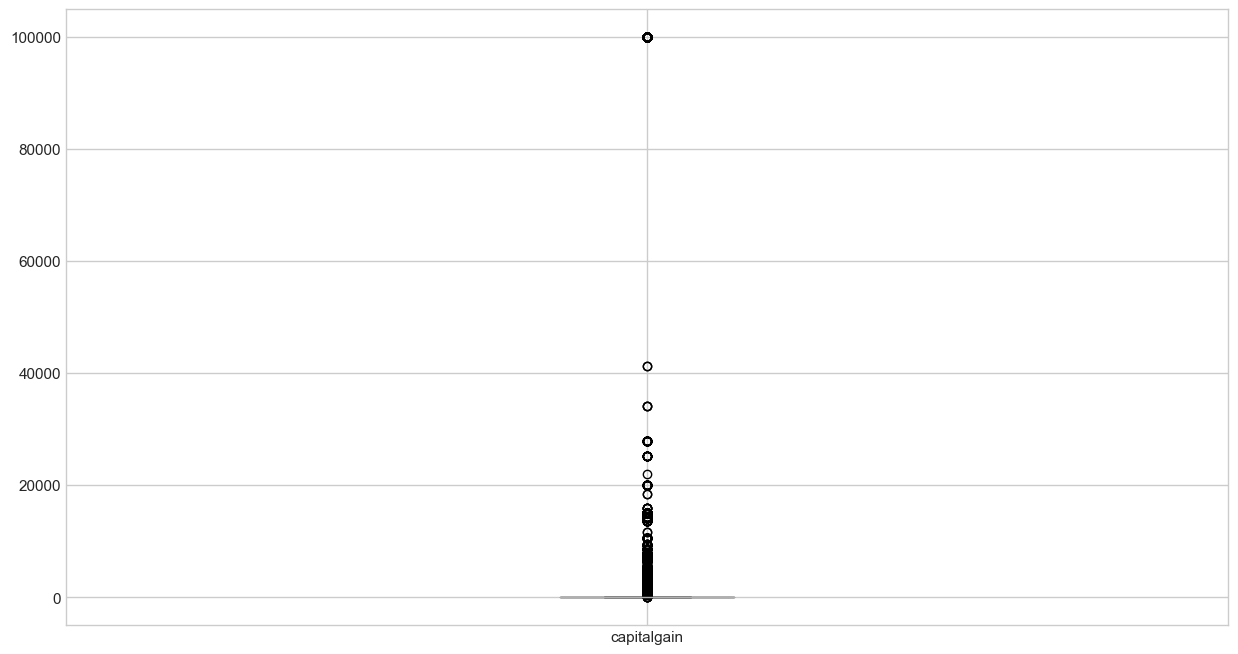

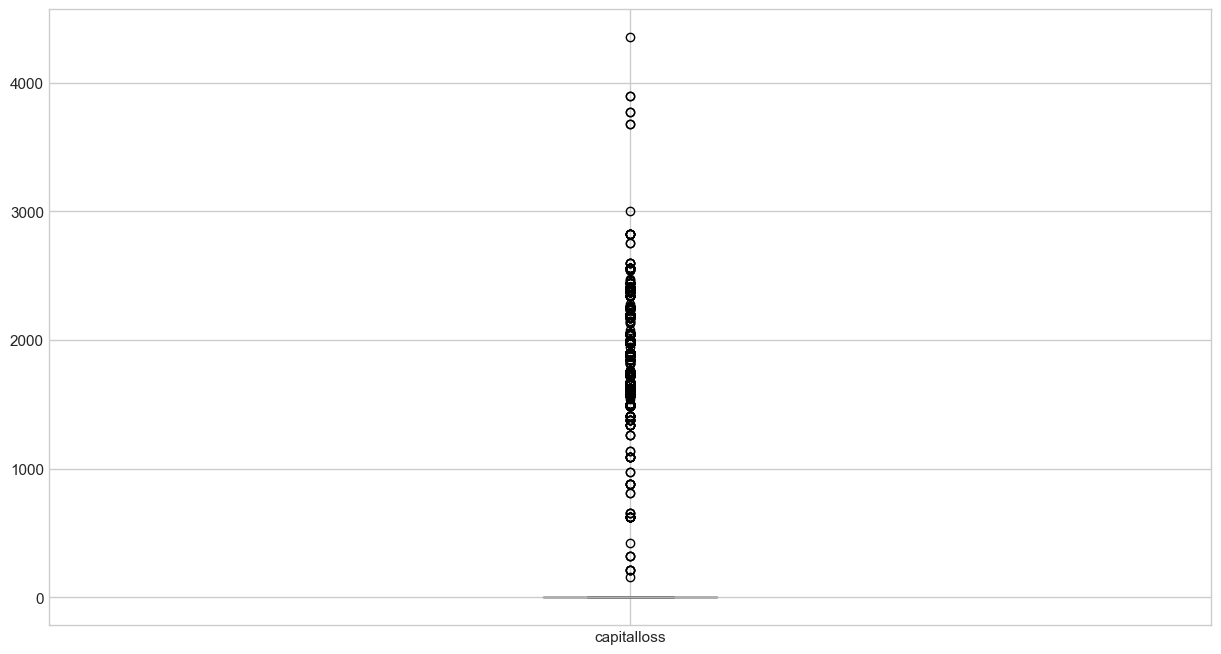

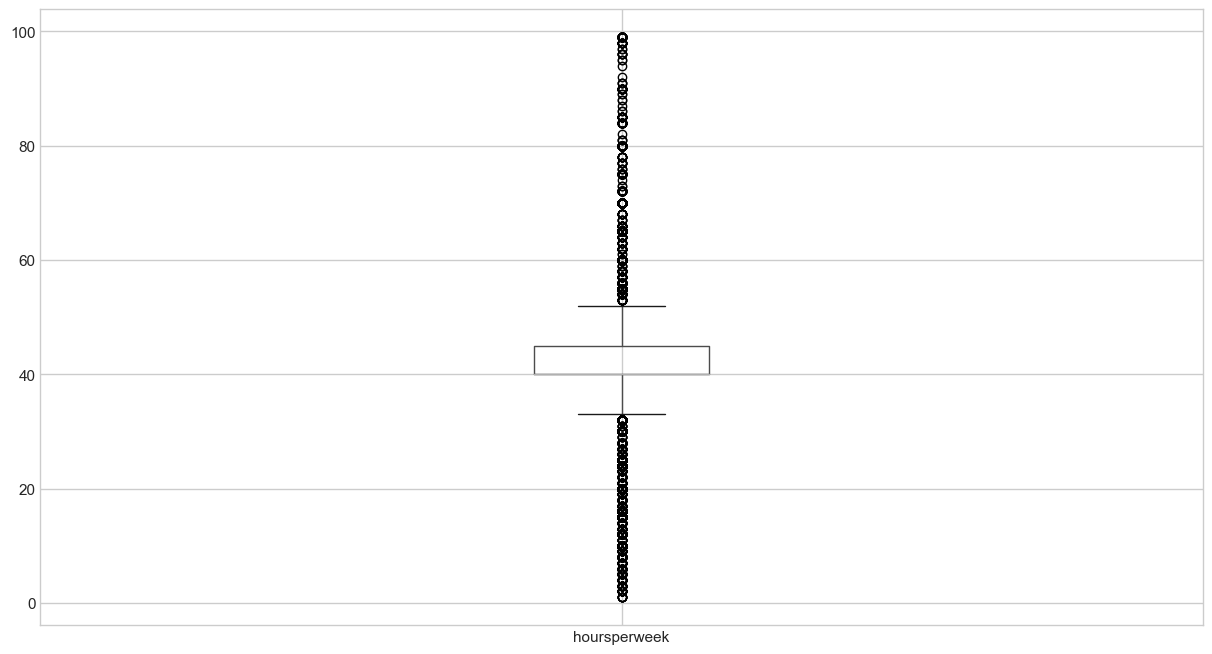

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

In [48]:
# Boxplots of all features
for column in Train_Data :
    plt.figure()
    if Train_Data[column].dtype == 'int64':
        Train_Data.boxplot([column])

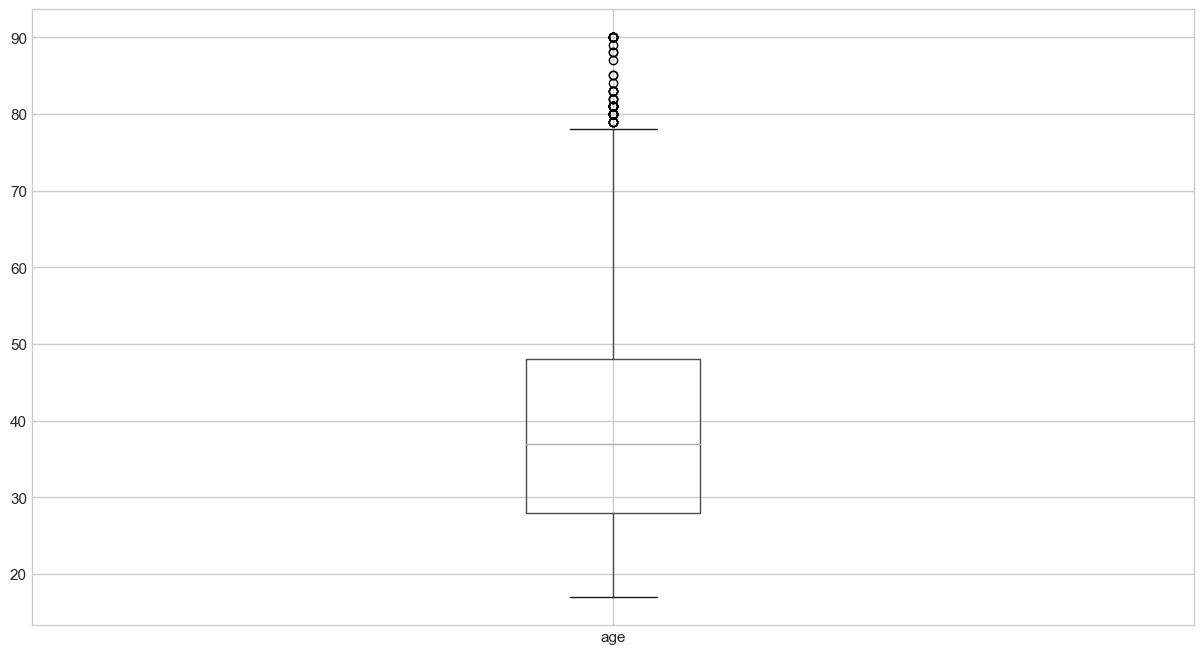

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

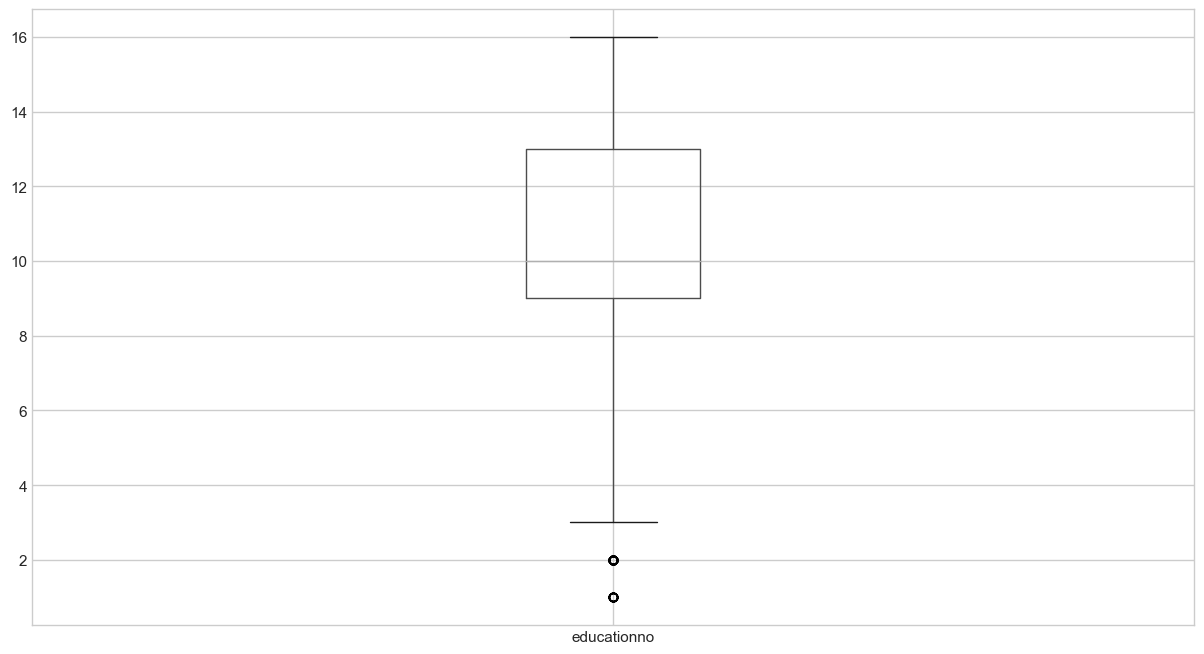

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

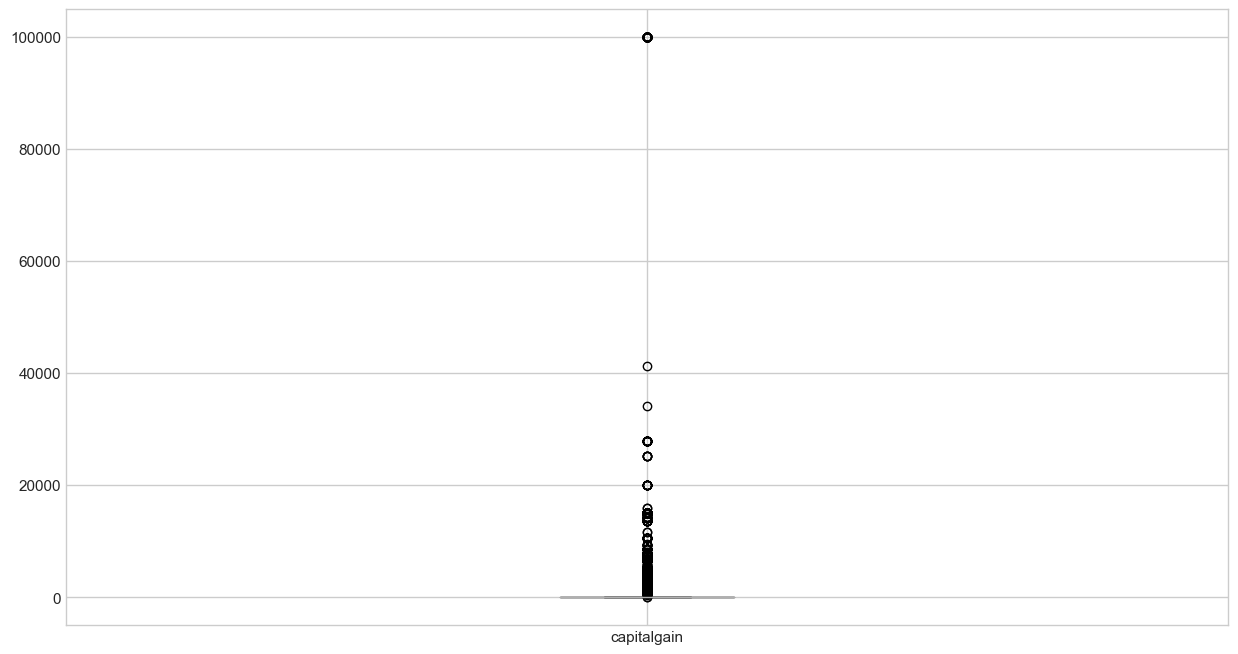

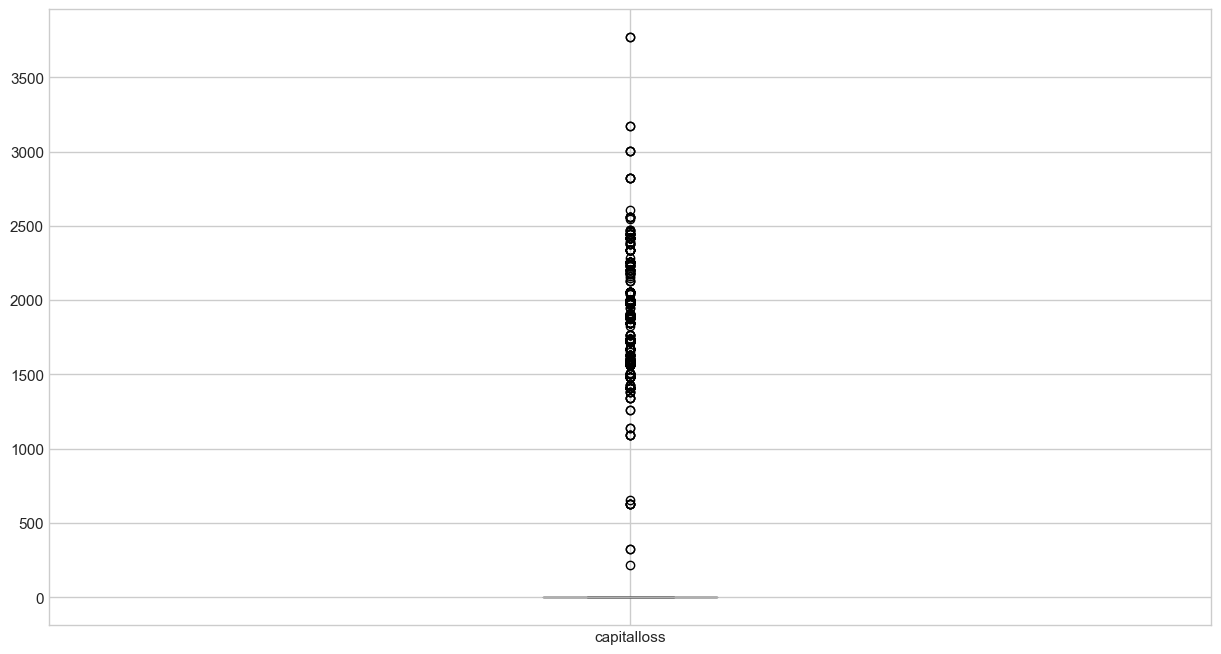

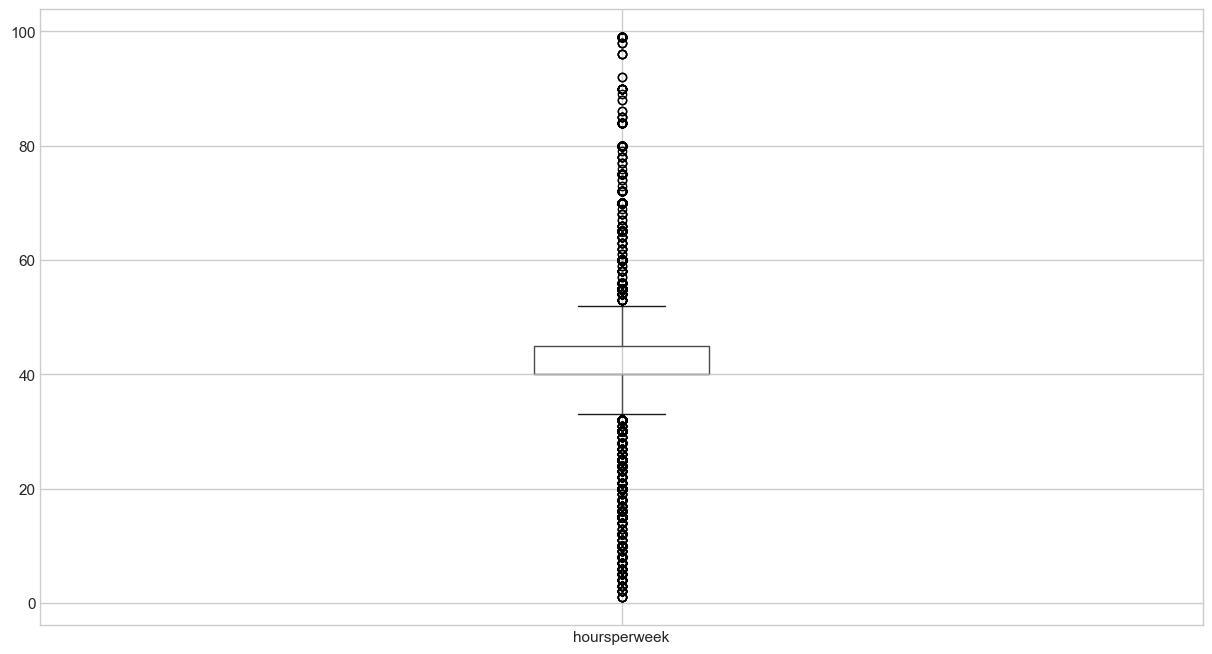

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

In [49]:
for column in Test_Data:
    plt.figure()
    if Test_Data[column].dtype=='int64':
        Test_Data.boxplot([column])

In [50]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
Train_Data['Salary']=Encoder.fit_transform(Train_Data['Salary'])
Test_Data['Salary']=Encoder.fit_transform(Test_Data['Salary'])

In [51]:
Train_Data1=pd.get_dummies(Train_Data)
Test_Data1=pd.get_dummies(Test_Data)

In [52]:
Train_Data1.shape

(30161, 103)

In [53]:
Test_Data1.shape

(15060, 103)

In [54]:
x_train=Train_Data1.drop(['Salary'],axis=1)
x_test=Test_Data1.drop(['Salary'],axis=1)
y_train=Train_Data1['Salary']
y_test=Test_Data1['Salary']

In [55]:
print('SHAPE OF X_TRAIN :', x_train.shape)
print('SHAPE OF Y_TRAIN :', y_train.shape)
print('SHAPE OF X_TEST :', x_test.shape)
print('SHAPE OF Y_TEST :', y_test.shape)

SHAPE OF X_TRAIN : (30161, 102)
SHAPE OF Y_TRAIN : (30161,)
SHAPE OF X_TEST : (15060, 102)
SHAPE OF Y_TEST : (15060,)


## MODEL BUILDING

In [56]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix

In [57]:
model=SVC()

In [58]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("The accuracy score is:",accuracy_score(y_test,y_pred))
result1=classification_report(y_test,y_pred)
print("\nClassification Report\n",result1)

The accuracy score is: 0.7964143426294821

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.73      0.27      0.39      3700

    accuracy                           0.80     15060
   macro avg       0.77      0.62      0.64     15060
weighted avg       0.79      0.80      0.76     15060



In [59]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
print('Confusion Matrix is : \n',confusion_matrix(y_test,y_pred))

Confusion Matrix is : 
 [[10997   363]
 [ 2703   997]]
